# Import Packages
-------

In [ ]:
pip install jieba

In [ ]:
pip install imageio

In [ ]:
pip install wordcloud

In [ ]:
pip install SnowNLP

In [ ]:
pip install Pillow

In [1]:
import codecs
import re
import jieba
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from snownlp import SnowNLP
import seaborn as sns
from pylab import *
from PIL import Image

# Text Analysis
------------

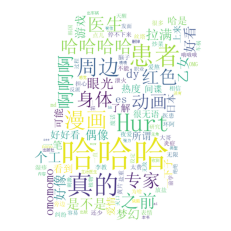

In [5]:
file = open("王太太🧸🍯💙_20220907_201544.txt", encoding = 'utf-8')

text = file.read()
file.close()

seg_str = jieba.cut(text, cut_all = False)
liststr = "/".join(seg_str)

f_stop = open('cn_stopwords.txt', encoding = 'utf8')
f_stop_text = f_stop.read()
f_stop.close()

mywordlist = []
f_stop_seg_list = f_stop_text.split('\n')

for myword in liststr.split('/'):
    if not(myword.strip() in f_stop_seg_list)and len(myword.strip())>1:
        mywordlist.append(myword)

ss = ' '.join(mywordlist)

bg = "Bunnies.jpeg"
imgbg = imread(bg)
a = WordCloud(font_path = "simsun.ttf", background_color = 'white', width = 1000, height = 800, mask = imgbg)
a.generate(ss)

plt.imshow(a)
plt.axis("off")
plt.show()
a.to_file('wc.png')

# Sentimental Analysis
-------

0.7689998628630069


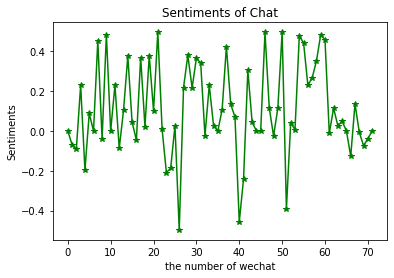

In [19]:
import snownlp as sn
 
def sentiment(text):
    s = sn.SnowNLP(text)
    return s.sentiments
 
text = '王太太🧸🍯💙_20220907_201544.txt'
 
print(sentiment(text))

plt.plot(np.arange(0,72,1),result, 'g*-')
plt.xlabel('the number of wechat')
plt.ylabel('Sentiments')
plt.title('Sentiments of Chat')
plt.show()

0 means most negative words, while 1 means most positive words